In [1]:
from scripts import optimization, model, visualizations
import numpy as np
np.random.seed(1)

import matplotlib.pyplot as plt
import pickle


              -- N E S T --
  Copyright (C) 2004 The NEST Initiative

 Version: 3.6.0
 Built: Sep 28 2023 11:53:34

 This program is provided AS IS and comes with
 NO WARRANTY. See the file LICENSE for details.

 Problems or suggestions?
   Visit https://www.nest-simulator.org

 Type 'nest.help()' to find out more about NEST.



In [2]:
#Parameters

move_params = {
                'weights_range': [(-10, 10), (-20, 20), (-30, 30)],
                'weights_change_range': [(-1, 1), (-2, 2), (-3, 3)],
                'optimise_input_weights': [False]
            }
lamb = 0

optimisation_steps = 500
runtime = 35000
resolution = 1

cost_type = 'boundary'

categorized_neurons_path = '/hpc/mzhu843/modelling/nest/DATA/processed/model1/categorised_neurons_5.pkl'
place_obs_path = '/hpc/mzhu843/modelling/nest/DATA/processed/model1/place_obs.npy'
spikes_obs_path = '/hpc/mzhu843/modelling/nest/DATA/processed/model1/spikes_obs.npy'
int_obs_path = '/hpc/mzhu843/modelling/nest/DATA/processed/model1/int_obs.npy'
int_spikes_obs_path = '/hpc/mzhu843/modelling/nest/DATA/processed/model1/int_spikes_obs.npy'
weights_path = weights = '/hpc/mzhu843/modelling/nest/DATA/processed/model1/weights2.npy'

g_e, g_i = 10, -30

save_results = True
save_calcium = False


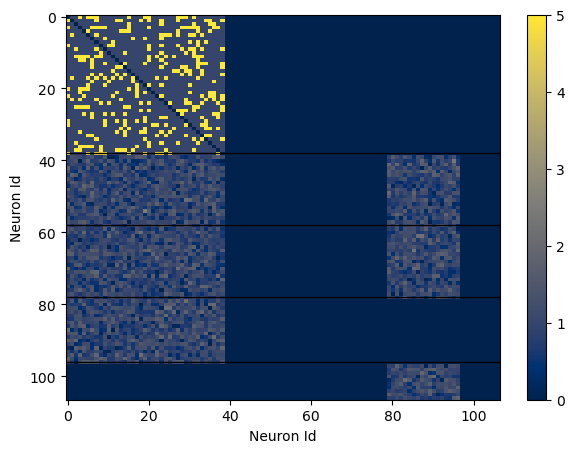

In [3]:
weights = np.load(weights_path)

for i in range(39):
    for j in range(39):
        if i == j:
            weights[i][j] = 0
        elif np.random.random() > 0.2:
            weights[i][j] = 1
        else:
            weights[i][j] = 5

np.save('/hpc/mzhu843/modelling/nest/DATA/processed/model1/weights2.npy', weights)


visualizations.plot_matrix(weights)

In [4]:
with open(categorized_neurons_path, 'rb') as file:
    categorized_neurons = pickle.load(file)

In [5]:
network = model.Model1(categorized_neurons, weights, G_e=g_e, G_i=g_i)

In [6]:
place_obs = np.load(place_obs_path)[:, 11299:12298]
spikes_obs = np.load(spikes_obs_path)[:, 11299:12298]
int_obs = np.load(int_obs_path)[:, 11299:12298]
int_spikes_obs = np.load(int_spikes_obs_path)[:, 11299:12298]

In [7]:
weights = np.load('/hpc/mzhu843/modelling/nest/DATA/processed/model1/weights.npy') 
for i in range(len(weights)):
    for j in range(len(weights[i])):
        if weights[i][j] > 0:
            if np.random.rand() < 0.2:
                weights[i][j] = 10
            else:
                weights[i][j] = 0


In [8]:
network = model.Model1(categorized_neurons, weights, G_e=g_e, G_i=g_i, runtime=35000)
network.simulate()

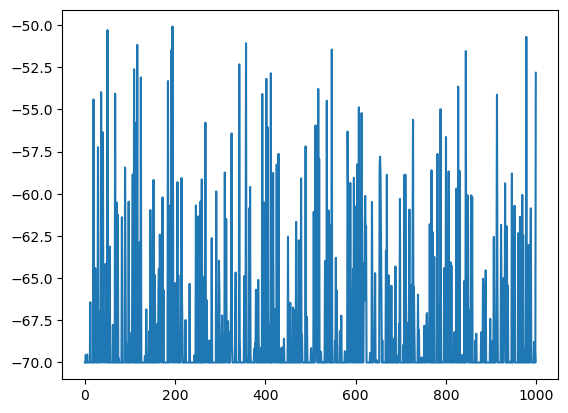

In [9]:
plt.plot(network.get_voltage_traces('Place')[0][::30][:1000])

In [10]:

problem = optimization.SimulatedAnnealing1(g_e, g_i, weights, place_obs, spikes_obs, int_obs, int_spikes_obs, lamb, categorized_neurons, runtime=runtime, move_params=move_params, cost_type=cost_type, resolution=resolution)
problem.steps = optimisation_steps

In [11]:
sensitivity_analysis = optimization.SensitivityAnalysis1(move_params, problem, ['weights_range', 'weights_change_range'], weights1= weights, 
                                                        save_results=save_results, save_calcium=save_calcium, results_dir='/hpc/mzhu843/modelling/nest/results/optimisation/setup_3/')
param_perms = sensitivity_analysis.generate_param_permutations()
results = sensitivity_analysis.run_analysis()

 Temperature        Energy    Accept   Improve     Elapsed   Remaining
     2.50000    1275114.91     0.00%     0.00%     0:03:45     0:00:00 Temperature        Energy    Accept   Improve     Elapsed   Remaining
     2.50000    1274282.58    20.00%    20.00%     0:03:37     0:00:00 Temperature        Energy    Accept   Improve     Elapsed   Remaining
     2.50000    1307108.09    20.00%    20.00%     0:03:37     0:00:00 Temperature        Energy    Accept   Improve     Elapsed   Remaining
     2.50000    1308119.15     0.00%     0.00%     0:03:36     0:00:00 Temperature        Energy    Accept   Improve     Elapsed   Remaining
     2.50000    1310249.91     0.00%     0.00%     0:03:39     0:00:00 Temperature        Energy    Accept   Improve     Elapsed   Remaining
     2.50000    1332896.93     0.00%     0.00%     0:03:36     0:00:00 Temperature        Energy    Accept   Improve     Elapsed   Remaining
     2.50000    1337687.56     0.00%     0.00%     0:03:35     0:00:00 Temperature 